
### Explanation of Model Architecture:
1. I chose a simple feedforward neural network with:
   - Input layer that flattens the 28x28 images into 784-dimensional vectors
   - Two hidden layers with ReLU activation (128 and 64 units respectively)
   - Output layer with 10 units (one for each digit) and softmax activation

2. ReLU activation is used in hidden layers because:
   - It helps mitigate the vanishing gradient problem
   - It's computationally efficient
   - It introduces non-linearity to the model

3. Softmax is used in the output layer because:
   - We need probability distribution over 10 classes
   - It's perfect for multi-class classification problems



In [1]:
# a. Import the libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# b. Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# c. Normalize the images to the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0



In [4]:
# d. Reshape for the dense model (Flatten the 2D 28x28 images)
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)



In [5]:
# e. One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8694 - loss: 0.4614 - val_accuracy: 0.9602 - val_loss: 0.1348
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9639 - loss: 0.1183 - val_accuracy: 0.9689 - val_loss: 0.1037
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9775 - loss: 0.0766 - val_accuracy: 0.9690 - val_loss: 0.1063
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9821 - loss: 0.0569 - val_accuracy: 0.9710 - val_loss: 0.0982
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9867 - loss: 0.0401 - val_accuracy: 0.9746 - val_loss: 0.0910
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9887 - loss: 0.0339 - val_accuracy: 0.9733 - val_loss: 0.0939
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9913 - loss: 0.0268 - val_accuracy: 0.9707 - val_loss: 0.1088
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9927 - loss: 0.022

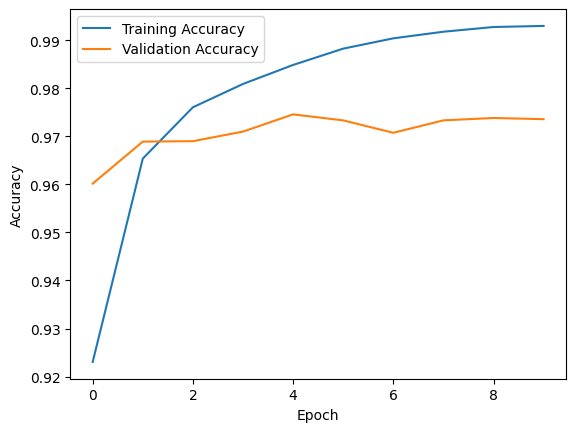

In [6]:
# f. Build a simple feedforward neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28*28,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])



In [7]:
# g. Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9935 - loss: 0.0183 - val_accuracy: 0.9763 - val_loss: 0.1202
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9957 - loss: 0.0120 - val_accuracy: 0.9760 - val_loss: 0.1264
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9956 - loss: 0.0126 - val_accuracy: 0.9743 - val_loss: 0.1325
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9962 - loss: 0.0113 - val_accuracy: 0.9755 - val_loss: 0.1256
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9956 - loss: 0.0122 - val_accuracy: 0.9728 - val_loss: 0.1341
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9969 - loss: 0.0088 - val_accuracy: 0.9745 - val_loss: 0.1397
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9973 - loss: 0.0078 - val_accuracy: 0.9724 - val_loss: 0.1544
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9961 - loss: 0.0110 

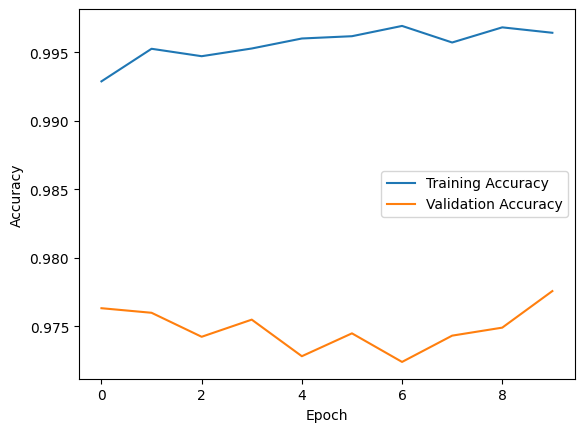

In [8]:
# h. Train the model
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=10,
    validation_split=0.2
)

In [9]:
# i. Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9741 - loss: 0.1697
Test accuracy: 0.9781


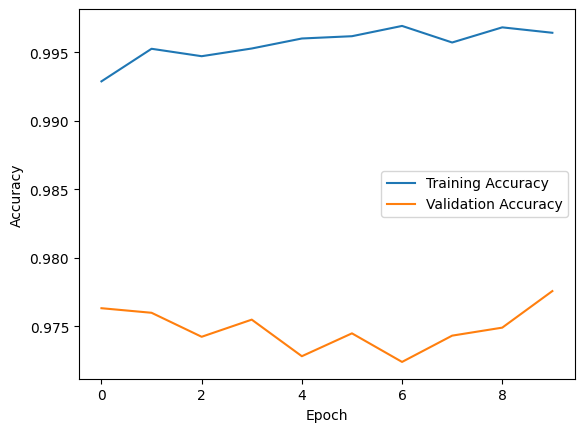

In [10]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()